# Prática III

Eduardo Garcia Misiuk - 9293230 
Mauricio Caetano da Silva - 9040996

Datasets escolhidos: Titanic e Agro

### Antes de prosseguir com a análise dos dados é importante destacar a necessidade da instalação dos pacotes "python3-matplotlib" e "python3-seaborn" para a correta execução.

# Primeira parte: Titanic

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

att = ['Survived','Pclass','Age','SibSp','Fare']

titanic = pd.read_csv('titanic.csv', usecols=att)
titanic

,Survived,Pclass,Age,SibSp,Fare
0,0,3,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500
5,0,3,NaN,0,8.4583
6,0,1,54.0,0,51.8625
7,0,3,2.0,3,21.0750
8,1,3,27.0,0,11.1333
9,1,2,14.0,1,30.0708


### Questão 1)
**Listar novamente as perguntas/hipóteses em sua versão final da prática anterior, listar quais colunas 
foram selecionadas. Se alguma pergunta já foi respondida com a análise anterior refine a questão de 
modo que você ache que as análises realizadas hoje ajudarão a responder.**

As questões feitas na análise anterior foram:
- A classe de passagem influenciou na sobrevivência das pessoas?
- O gênero das pessoas influenciou na chance delas sobreviverem?
- A faixa de idade das pessoas foi um fator determinante para sua sobrevivência? (independentemente de gênero)

Colunas escolhidas:
- Survived
- Pclass
- Age
- SibSp
- Fare

Foi retirada a coluna Gender pois ela não era numérica e, por isso, mudamos uma das perguntas.

- A classe de passagem influenciou na sobrevivência das pessoas?
- Pclass e Fare são relacionados.
- A faixa de idade das pessoas foi um fator determinante para sua sobrevivência? (independentemente de gênero)

### Questão 2)
**Plote os histograma dos atributos selecionados.
Como você fez a escolha do parâmetro de intervalo (bin)? Por faixa (para altura, por exemplo, intervalo de 5cm), por quantidade (cada intervalo com tamanho 5, 0-5, 5-10, ...) ... ? Por que?**

**O parâmetro bin pode ser complicado para ajustar corretamente e pode distorcer bastante o histograma. Uma regra prática é tentar garantir que cada intervalo tenha um número mínimo de exemplos, uns 30 em cada bin deve ser suficiente. Mesmo assim nos bins das pontas é difícil cumprir essa regra.
Se achar interessante para sua análise, divida os dados de algum atributo e plote o histograma para cada
parte sobreposto.**

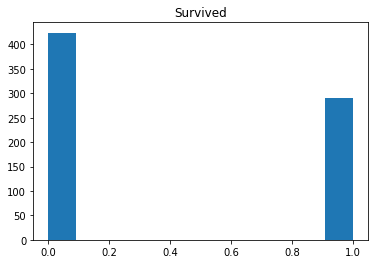

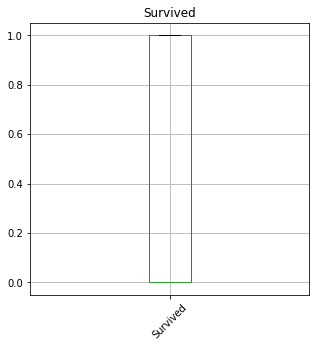

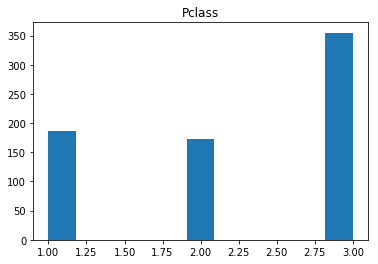

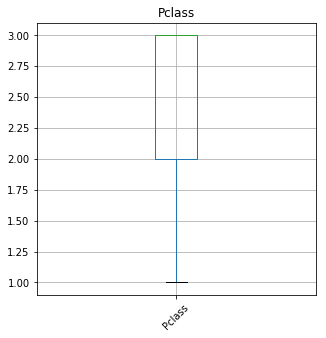

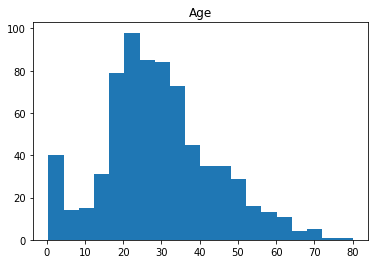

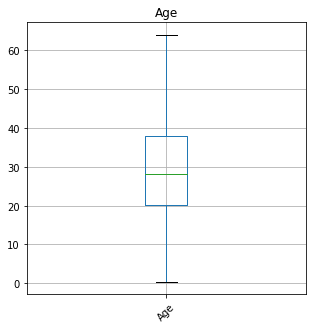

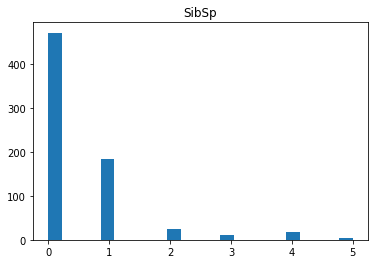

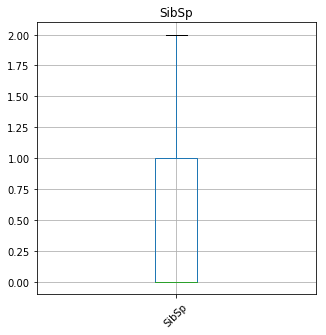

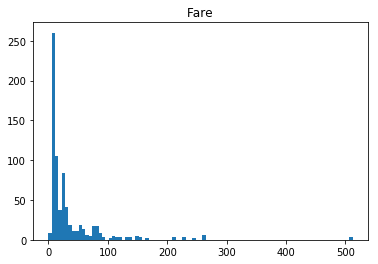

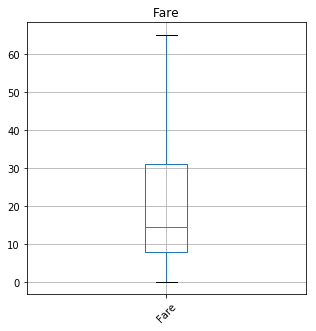

In [2]:
# Histogramas e Boxplots
for i in [0,1,2,3,4]:
    plt.hist(titanic.dropna().iloc[:, i], bins='auto')
    plt.title(titanic.columns[i])
    plt.show()

    titanic.boxplot(column=titanic.columns[i], rot=45, figsize=(5, 5), sym='')
    plt.title(titanic.columns[i])
    plt.show()

Após testarmos vários valores para o atributo *bins*, decidimos deixar ele com o valor *auto* para dedixar menos poluição visual no código. Faremos agora uma análise dos experimentos com o valor deste atributo.

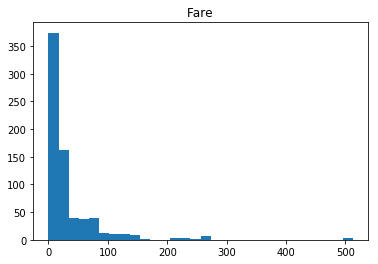

In [3]:
plt.hist(titanic.dropna().iloc[:, 4], bins=30)
plt.title("Fare")
plt.show()

No histograma de *Fare* com *bins=30* percebe-se a tendência dos maiores valores terem menos instâncias e os menores valores terem mais instâncias. Obviamente, o histograma com *bins='auto'* ficou muito melhor de se visualizar esta tendência, sendo este um ponto positivo do correto dimensionamento deste atributo.

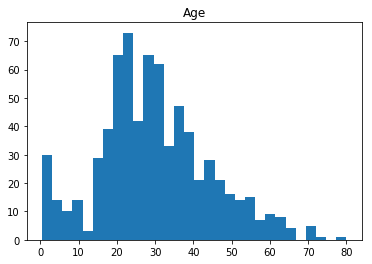

In [4]:
plt.hist(titanic.dropna().iloc[:, 2], bins=30)
plt.title("Age")
plt.show()

Já no caso do atributo *Age*, podemos perceber que seu histograma ficou com quedas no meio da curva que, como visto na prática 2, se assemelha a uma normal. Neste caso, 30 *bins* é muito para representar os dados de uma melhor forma, o que percebemos quando colocamos 20 *bins*, um valor aproximado do que o algoritmo selecionou no caso do *bins='auto'*.

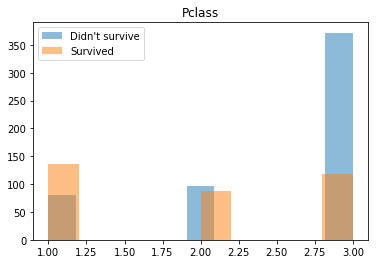

In [5]:
col = 1
for c in titanic.iloc[:, 0].unique():
    plt.hist(titanic[titanic.iloc[:, 0] == c].iloc[:, col].dropna(), bins='auto', alpha=0.5)

plt.title("Pclass")
plt.legend(["Didn't survive", "Survived"])
plt.show()

Podemos ver por este outro histograma que o número de pessoas que não sobreviveram é muito maior no caso da passagem de 3ª classe e bem menor na 1ª classe.

**Explique a relação do histograma com o boxplot, o que um mostra que o outro não? Como é possível inferir um do outro? Sugestão: plotar um boxplot e um histograma de um mesmo atributo pode ajudar a entender e responder a pergunta.**

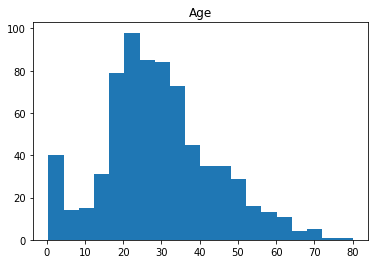

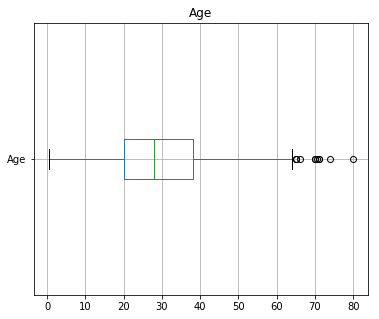

In [22]:
plt.hist(titanic.iloc[:, 2].dropna(), bins='auto')
plt.title(titanic.columns[2])
plt.show()

titanic.boxplot(column=titanic.columns[2], figsize=(6, 5), vert=False)
plt.title(titanic.columns[2])
plt.show()

O boxplot permite visualizar onde a maior parte dos dados está concentrada e também como a curva se comporta. Podemos ver que a curva é inclinada um pouco para a esquerda (o momento central 3 desta curva mostra isso, ele vale aproximadamente 0.38, e o boxplot já mostra isso, deixando os quartis mais à esquerda) e a faixa com a maior quantidade de atributos está entre 20 e 40 anos - algo que o boxplot já mostra.

### Questão 3)
**Execute a covariância e a correlação entre os atributos selecionados. No seu caso, qual das duas é mais informativa? Explique.**

**Qual a diferença entre as duas e quando é mais indicado utilizar uma ao invés da outra?**

**De que forma elas ajudam, se é que ajudam, a responder suas perguntas?**

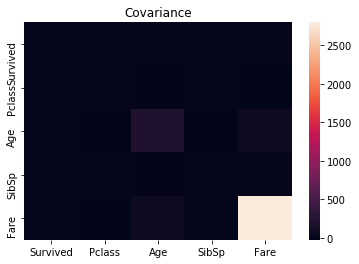

          Survived     Pclass         Age     SibSp         Fare
Survived  0.241533  -0.148165   -0.551296 -0.007932     6.974923
Pclass   -0.148165   0.702663   -4.496004  0.052412   -24.583138
Age      -0.551296  -4.496004  211.019125 -4.163334    73.849030
SibSp    -0.007932   0.052412   -4.163334  0.864497     6.806212
Fare      6.974923 -24.583138   73.849030  6.806212  2800.413100


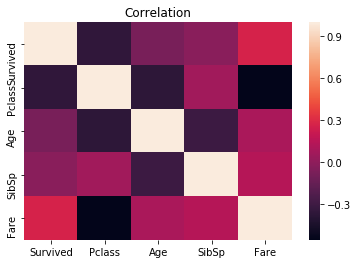

          Survived    Pclass       Age     SibSp      Fare
Survived  1.000000 -0.359653 -0.077221 -0.017358  0.268189
Pclass   -0.359653  1.000000 -0.369226  0.067247 -0.554182
Age      -0.077221 -0.369226  1.000000 -0.308247  0.096067
SibSp    -0.017358  0.067247 -0.308247  1.000000  0.138329
Fare      0.268189 -0.554182  0.096067  0.138329  1.000000


In [7]:
import seaborn as sns

cov = titanic.dropna().cov()
sns.heatmap(cov)
plt.title("Covariance")
plt.show()
print(cov)

corr = titanic.dropna().corr()
sns.heatmap(corr)
plt.title("Correlation")
plt.show()
print(corr)

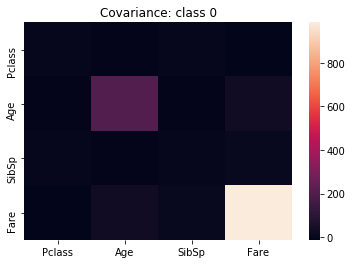

           Pclass         Age      SibSp        Fare
Pclass   0.541409   -4.575633   0.119178  -11.949161
Age     -4.575633  200.848698  -5.977868   34.252812
SibSp    0.119178   -5.977868   1.659972   11.408593
Fare   -11.949161   34.252812  11.408593  985.219509


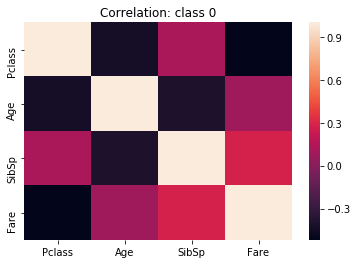

          Pclass       Age     SibSp      Fare
Pclass  1.000000 -0.434168  0.125714 -0.517378
Age    -0.434168  1.000000 -0.403734  0.076852
SibSp   0.125714 -0.403734  1.000000  0.282108
Fare   -0.517378  0.076852  0.282108  1.000000


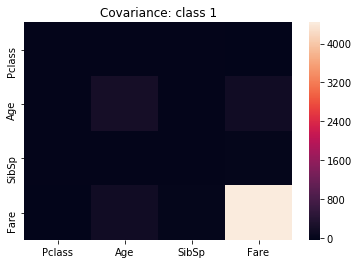

           Pclass         Age     SibSp         Fare
Pclass   0.745322   -5.229355 -0.020374   -30.939233
Age     -5.229355  223.530965 -1.566532   171.337421
SibSp   -0.020374   -1.566532  0.502238     5.799799
Fare   -30.939233  171.337421  5.799799  4435.160158


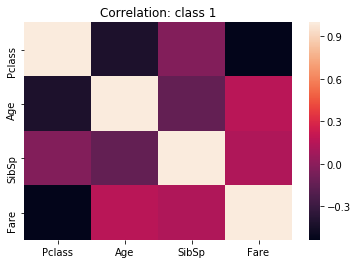

          Pclass       Age     SibSp      Fare
Pclass  1.000000 -0.418073 -0.033300 -0.538125
Age    -0.418073  1.000000 -0.143309  0.162648
SibSp  -0.033300 -0.143309  1.000000  0.122886
Fare   -0.538125  0.162648  0.122886  1.000000


In [8]:
for c in titanic.iloc[:, 0].unique():
    cov = titanic[titanic.iloc[:, 0] == c].iloc[:, 1:5].cov()
    sns.heatmap(cov)
    plt.title("Covariance: class " + str(c))
    plt.show()
    print(cov)

    corr = titanic[titanic.iloc[:, 0] == c].iloc[:, 1:5].corr()
    sns.heatmap(corr)
    plt.title("Correlation: class " + str(c))
    plt.show()
    print(corr)

A covariância é uma medida de inter-relação entre variáveis; correlação indica a força da relação linear entre duas variáveis. Um dado interessante extraído sobre o atributo Fare é que ele tem covariâncias altas com todos os atributos, porém isso se explica pelo fato dele ter outliers de valores muito altos, logo suas covariâncias não são tão interessantes para a análise. 

### Questão 4)
**Gere em um único gráfico os scatter plots dos atributos selecionados, como no slide. Mude a cor dos exemplos de maneira a ajudar na interpretação do problema e a responder suas perguntas.**

**Por exemplo, no iris se colorir os exemplos por classe é possível ver que a classe setosa não tem sobreposição com as outras duas para dois dos scatter plots.**

**Além da separação entre classes, o scatter plot permite uma inspeção visual rápida de grupos (clusters).**

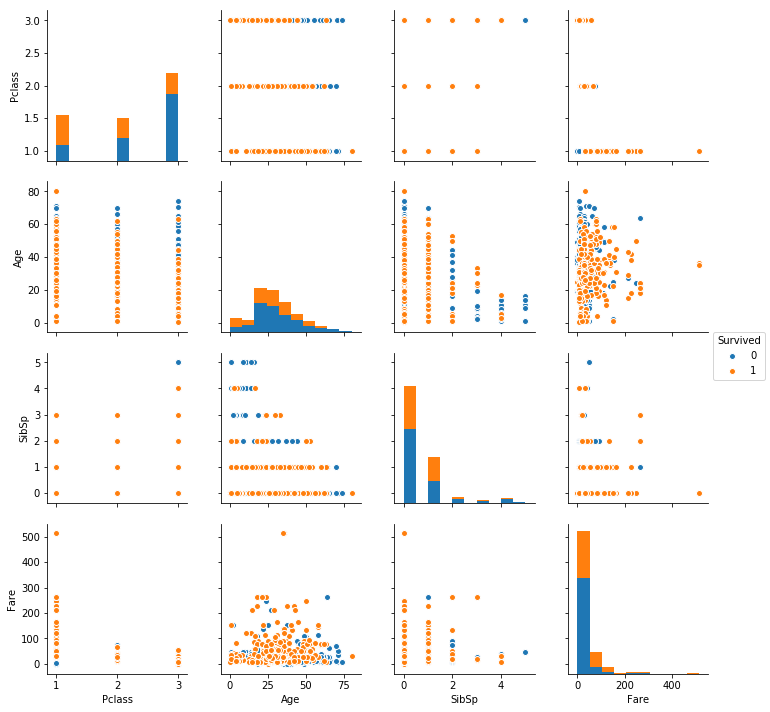

In [9]:
columns = titanic.columns.tolist()
sns.pairplot(data=titanic.dropna(), vars=columns[1:5], hue=columns[0])
plt.show()

Nesta base de dados, o *scatter plot* não mostra muitos possíveis *clusters* dos dados.

### Questão 5)
**Explique como os gráficos permitem uma inspeção mais fácil e intuitiva de tendências, padrões e outliers? Se achar mais fácil use exemplos já explorados mas refaça os gráficos aqui para ilustrar seu ponto.**

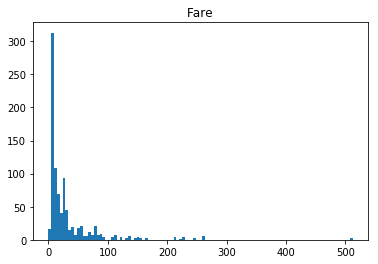

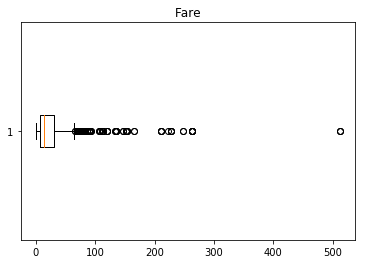

In [23]:
col = 4
plt.hist(titanic.iloc[:, col].dropna(), bins='auto')
plt.title(columns[col])
plt.show()

plt.boxplot(titanic.iloc[:, col], vert=False)
plt.title(columns[col])
plt.show()

Nos gráficos acima podemos perceber uma tendência de poucas pessoas terem pago uma taxa alta e muitas terem pago pouca ou nenhuma taxa. Além deste padrão, podemos perceber pelo boxplot os outliers. Estes são melhor vistos pelo boxplot ao invés do histograma, já que nele temos os quartis.

### Questão 6)
**Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas.**

- A classe de passagem influenciou na sobrevivência das pessoas?
Como visto nos histogramas, principalmente no histograma de Pclass com classes, a classe de passagem teve um impacto grande na sobrevivência ou não da pessoa. As de 3ª classe foram a maior parte das vítimas.
- Pclass e Fare são relacionados.
A análise multivariada nos revela que a covariância é aproximadamente -24.6, indicando que as variáveis são inversamente proporcionais, e a correlação vale aproximadamente -0.55, o que nos indica uma associação inversa com força média entre elas.
- A faixa de idade das pessoas foi um fator determinante para sua sobrevivência? (independentemente de gênero)
O scatter plot indica uma possível relação, porém a distribuição das idades não é igual em todo o espectro, o que torna esta análise somente com o scatter plot complicada. A análise multivariada também não mostra que há uma relação entre a idade e a sobrevivência

In [ ]:
# Segunda parte: Agro

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

att = ['Ciclo', 'Perc_Falha', 'Ph', 'Mo', 'P', 'K', 'Ca', 'Mg', 'H_al', 'Al', 'S', 'CORR_T']

agro = pd.read_csv('agro.csv', usecols=att)
agro

,Perc_Falha,Ciclo,Ph,Mo,P,K,Ca,Mg,H_al,Al,S,CORR_T
0,0.0039,18M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,0.0016,18M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,0.0019,18M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,0.0182,18M,4.65,8.50,6.5,2.775,10.060,6.705,16.000,1.440,0.0,0.47
4,0.0214,18M,4.65,7.00,6.5,2.470,9.495,7.305,19.000,1.515,0.0,0.33
5,0.0153,18M,4.65,7.00,6.5,2.470,9.495,7.305,19.000,1.515,0.0,0.32
6,0.0056,18M,4.75,9.50,6.0,2.780,10.970,7.535,17.500,0.580,0.0,0.32
7,0.0073,18M,4.75,9.50,6.0,2.780,10.970,7.535,17.500,0.580,0.0,0.32
8,0.1040,18M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
9,0.0062,18M,4.40,8.50,25.5,1.620,8.480,4.135,24.000,2.590,0.0,3.92


### Questão 1)
**Listar novamente as perguntas/hipóteses em sua versão final da prática anterior, listar quais colunas 
foram selecionadas. Se alguma pergunta já foi respondida com a análise anterior refine a questão de 
modo que você ache que as análises realizadas hoje ajudarão a responder.**

As questões feitas na análise anterior foram:
- A taxa de compostos químicos segue uma normal.
- Durante o inverno, a quantidade de compostos cai. 
- Uma alta taxa de algum composto químico aumenta a taxa de falha da plantação.

Colunas escolhidas:
- Ciclo
- Perc_Falha
- Ph
- Mo
- P
- K
- Ca
- Mg
- H_al
- Al
- S
- Corr_t

A segunda questão acima foi mudada pela seguinte:
- A quantidade de corretivo adicionado ao solo aumenta a chance de sucesso da colheita.

### Questão 2)
**Plote os histograma dos atributos selecionados.
Como você fez a escolha do parâmetro de intervalo (bin)? Por faixa (para altura, por exemplo, intervalo de 5cm), por quantidade (cada intervalo com tamanho 5, 0-5, 5-10, ...) ... ? Por que?**

**O parâmetro bin pode ser complicado para ajustar corretamente e pode distorcer bastante o histograma. Uma regra prática é tentar garantir que cada intervalo tenha um número mínimo de exemplos, uns 30 em cada bin deve ser suficiente. Mesmo assim nos bins das pontas é difícil cumprir essa regra.
Se achar interessante para sua análise, divida os dados de algum atributo e plote o histograma para cada
parte sobreposto.**

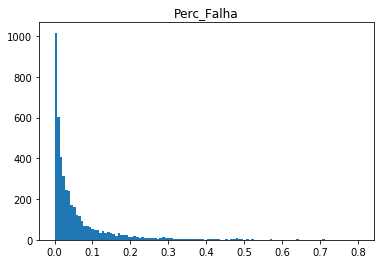

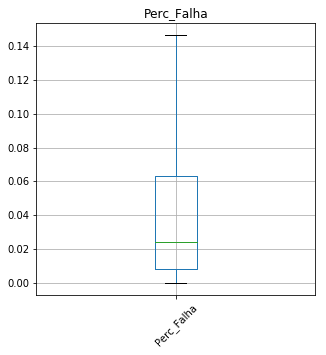

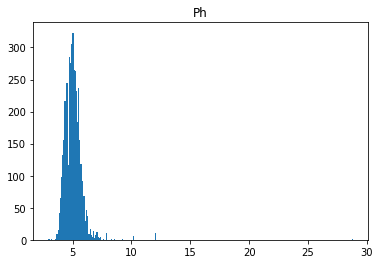

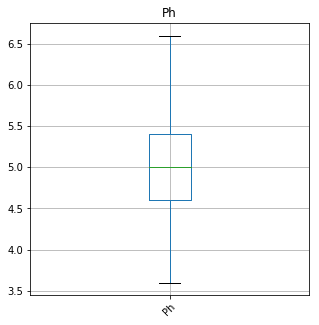

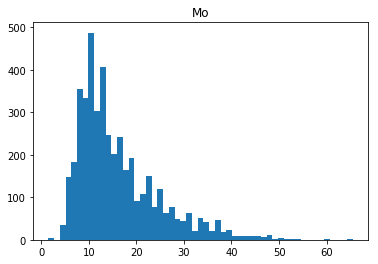

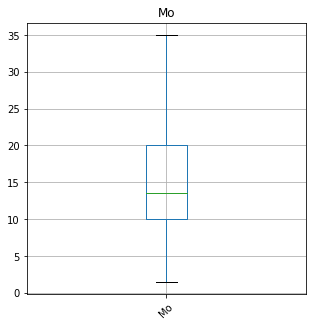

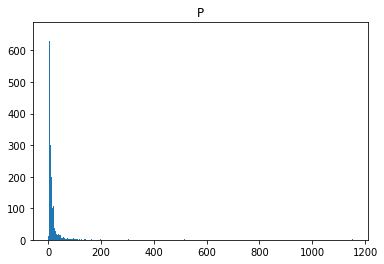

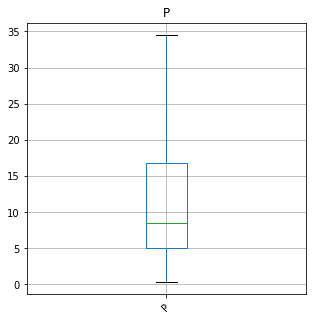

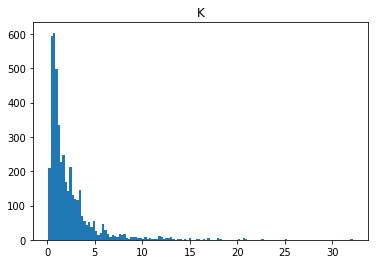

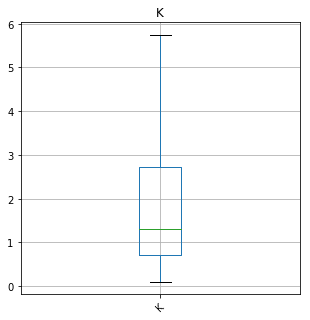

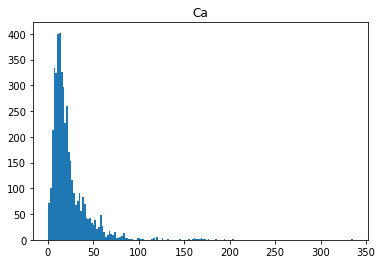

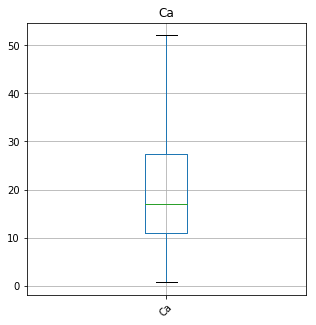

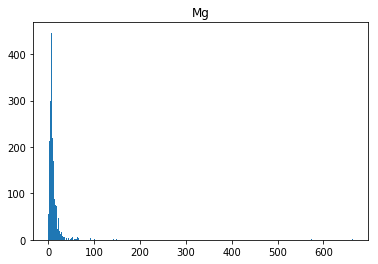

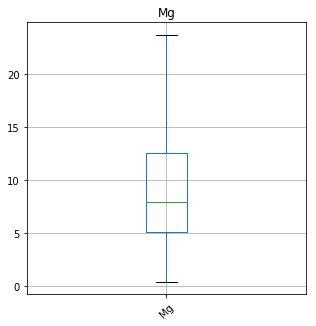

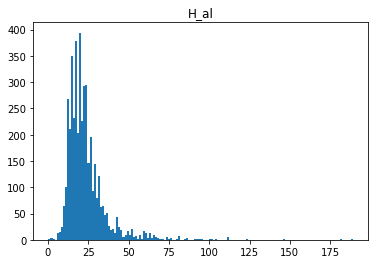

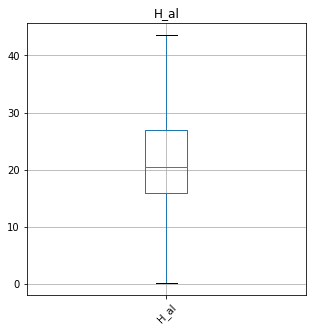

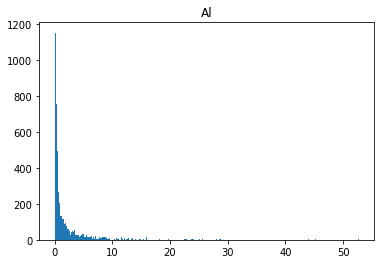

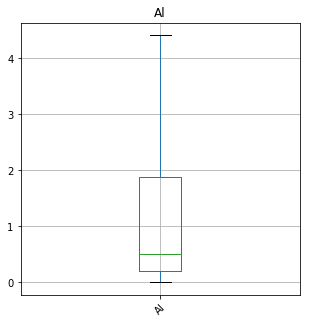

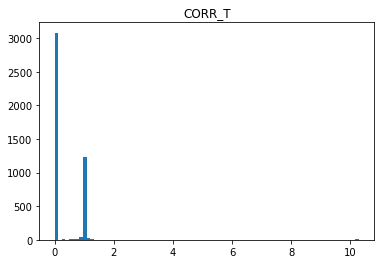

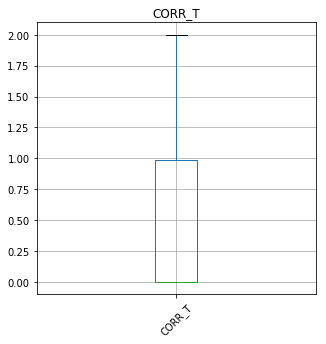

In [5]:
import sys
# Histogramas e Boxplots
for i in [0,2,3,4,5,6,7,8,9,11]:
    plt.hist(agro.dropna().iloc[:, i], bins='auto')
    plt.title(agro.columns[i])
    plt.show()

    agro.boxplot(column=agro.columns[i], rot=45, figsize=(5, 5), sym='', return_type='dict')
    plt.title(agro.columns[i])
    plt.show()

Assim como na base de dados anterior, decidimos deixar o atributo bins com o valor *auto* com objetivo de ter menos poluição visual no código. Abaixo temos alguns experimentos usando a variação de valores do parâmetro bins.

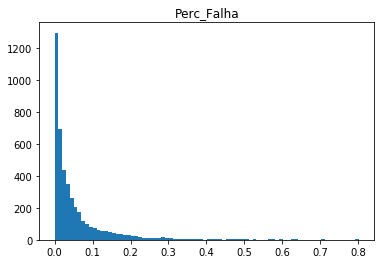

In [6]:
plt.hist(agro.dropna().iloc[:, 0], bins=80)
plt.title("Perc_Falha")
plt.show()

Como o número de instâncias é consideravelmente grande e o atributo "Perc_Falha" possui 4 casas de precisão, um número maior de intervalos é mais interessante para a visualização pois ele se ajusta melhor para as pequenas variações de valor que existem nos atributos. O exemplo com valor 80 se aproximou muito do valor selecionado automaticamente.

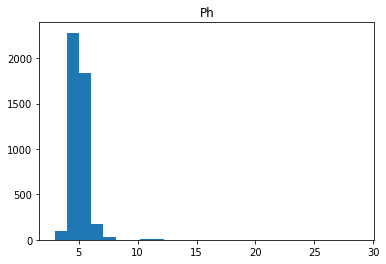

In [7]:
plt.hist(agro.dropna().iloc[:, 2], bins=25)
plt.title("Ph")
plt.show()

Como o valor de ph não possui grande variação de valores, foi testado um valor menor no número de intervalos em comparação com o exemplo anterior (atributo Perc_Falha), porém, nesse caso a visualização não foi tão boa pela maior agromeração de classes em uma mesma faixa.

**Explique a relação do histograma com o boxplot, o que um mostra que o outro não? Como é possível inferir um do outro? Sugestão: plotar um boxplot e um histograma de um mesmo atributo pode ajudar a entender e responder a pergunta.**

Para responder a essa pergunta vamos analisar o atributo "Al", que descreve a presença do composto químico Alumínio no solo.

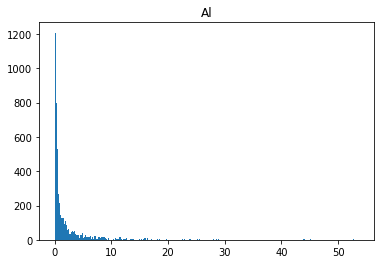

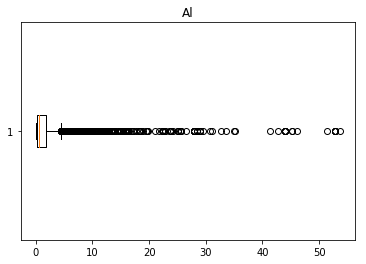

In [8]:
col = 9
plt.hist(agro.iloc[:, col].dropna(), bins='auto')
plt.title(agro.columns[col])
plt.show()

plt.boxplot(agro.iloc[:, col].dropna(), vert=False)
plt.title(agro.columns[col])
plt.show()

Nesse exemplo fica claro a importância do uso do boxplot para a análise de outliers, pois com a análise do histograma para essa característica não fica tão evidente a presença desses valores discrepantes. 
Além disso pode ser observado que os valores desse atributo tendem à esqueda do gráfico e isso pode ser visto tanto no histograma quanto no boxplot.
Outro ponto é que o histograma permite uma melhor visualização de como é o comportamento da curva relacionada ao atributo analisado.

### Questão 3)
**Execute a covariância e a correlação entre os atributos selecionados. No seu caso, qual das duas é mais informativa? Explique.**

**Qual a diferença entre as duas e quando é mais indicado utilizar uma ao invés da outra?**

**De que forma elas ajudam, se é que ajudam, a responder suas perguntas?**

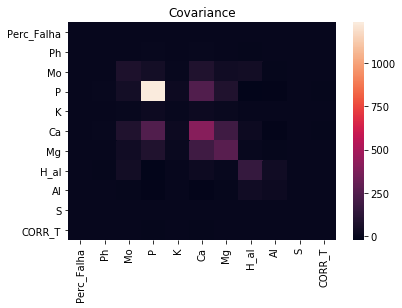

            Perc_Falha        Ph         Mo            P          K  \
Perc_Falha    0.007472  0.000084   0.047463     0.129768  -0.000801   
Ph            0.000084  0.655641  -0.298049     4.950617   0.327666   
Mo            0.047463 -0.298049  74.395736    43.720932   6.659704   
P             0.129768  4.950617  43.720932  1233.971593  22.352316   
K            -0.000801  0.327666   6.659704    22.352316   7.214848   
Ca            0.145930  4.935197  83.762276   244.204530  22.348414   
Mg            0.098066  2.391958  35.661314    85.854806   9.493792   
H_al          0.007824 -4.197767  42.794274   -20.439567   1.461318   
Al           -0.013537 -0.433996  -2.683709   -13.470036  -0.650560   
S             0.000821  0.036291  -0.643913     0.101359  -0.145125   
CORR_T        0.001549 -0.044769   0.109847    -1.076436  -0.125848   

                    Ca          Mg        H_al         Al         S    CORR_T  
Perc_Falha    0.145930    0.098066    0.007824  -0.013537  0.000821

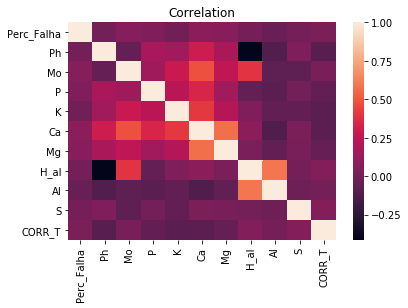

            Perc_Falha        Ph        Mo         P         K        Ca  \
Perc_Falha    1.000000  0.001197  0.063660  0.042737 -0.003448  0.083607   
Ph            0.001197  1.000000 -0.042676  0.174050  0.150655  0.301842   
Mo            0.063660 -0.042676  1.000000  0.144299  0.287453  0.480930   
P             0.042737  0.174050  0.144299  1.000000  0.236895  0.344278   
K            -0.003448  0.150655  0.287453  0.236895  1.000000  0.412041   
Ca            0.083607  0.301842  0.480930  0.344278  0.412041  1.000000   
Mg            0.069565  0.181137  0.253519  0.149864  0.216727  0.574127   
H_al          0.007225 -0.413814  0.396033 -0.046445  0.043426  0.080193   
Al           -0.033671 -0.115239 -0.066897 -0.082445 -0.052074 -0.119241   
S             0.009055  0.042731 -0.071175  0.002751 -0.051512  0.032207   
CORR_T        0.030167 -0.093099  0.021444 -0.051598 -0.078892 -0.073035   

                  Mg      H_al        Al         S    CORR_T  
Perc_Falha  0.069565  0.

In [9]:
import seaborn as sns

cov = agro.dropna().cov()
sns.heatmap(cov)
plt.title("Covariance")
plt.show()
print(cov)

corr = agro.dropna().corr()
sns.heatmap(corr)
plt.title("Correlation")
plt.show()
print(corr)

Na análise de covariância nada pode ser afirmado, uma vez que os valores de covariância estão muito próximos de zero, como pode ser visto no mapa de calor, acima.

Para a correlação existem 2 pontos a serem destacados:

1. Existe uma correlação considerável entre os atributos H_al e o PH do solo. Segundo algumas pesquisas realizadas, existe uma relação diretamente proporcional entre a presença desses elementos, hidrogênio e alumínio, como pode ser visto em [1], porém, como a base de dados não descreve com precisão o que seria o atributo "H_al", nada pode ser concluído.

2. Existem duas outras correlações interessantes entre os atributos:
    * a) Ca e Mg: 
        Existe uma proporção ideal entre cálcio (Ca) e Magnésio (Mg) no solo descritos por diversas fontes como em [2], e isso pode ser confirmado pelo mapa acima.
    * b) H_al e Al:
        Essa correlação pode ser considerada óbvia pois a presença de alumínio (Al) está sendo considerada em ambos os atributos.
            
Dessa forma, a análise de correlação é mais efetiva por prover mais informações para essa base de dados.




[1] - MARCONATO, José Carlos; FRANCHETTI, Sandra Mara Martins; PEDRO, Roberto José. A hidrólise de cátions metálicos no contexto da fertilidade dos solos. Departamento de Bioquímica e Microbiologia – IB – UNESP – Rio Claro SP. Disponível em: <http://sec.sbq.org.br/cdrom/29ra/resumos/T0072-1.pdf>. Acesso em: 19 set. 2018.

[2] - KOPITTKE, P. M.; MENZIES, N. W. A Review of the Use of the Basic Cation Saturation Ratio and the “Ideal” Soil. *Soil Science Society of America Journal*, Queensland, Austrália, v. 71, n. 2, p. 259-265, 2007

### Questão 4)
**Gere em um único gráfico os scatter plots dos atributos selecionados, como no slide. Mude a cor dos exemplos de maneira a ajudar na interpretação do problema e a responder suas perguntas.**

**Por exemplo, no iris se colorir os exemplos por classe é possível ver que a classe setosa não tem sobreposição com as outras duas para dois dos scatter plots.**

**Além da separação entre classes, o scatter plot permite uma inspeção visual rápida de grupos (clusters).**

Como os atributos analisados são contínuos, o scatter plot não pôde ser construído.

### Questão 5)
**Explique como os gráficos permitem uma inspeção mais fácil e intuitiva de tendências, padrões e outliers? Se achar mais fácil use exemplos já explorados mas refaça os gráficos aqui para ilustrar seu ponto.**

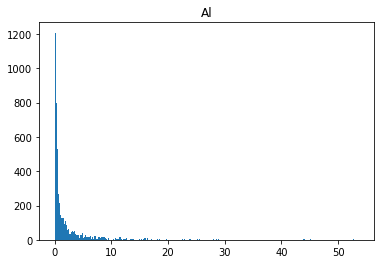

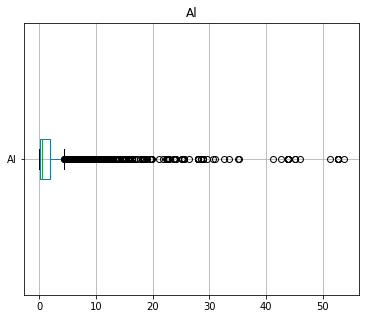

In [10]:
plt.hist(agro.iloc[:, 9].dropna(), bins='auto')
plt.title(agro.columns[9])
plt.show()

agro.boxplot(column=agro.columns[9], figsize=(6, 5), vert=False, return_type='dict')
plt.title(agro.columns[9])
plt.show()

Assim como visto na questão 2, a análise de dados por meio de histogramas e boxplots são muito vantajosas quando queremos analisar o comportamento, o "desenho" da função para o atributo e a presença de outliers na amostra, respectivamente. 
Essas representações combinadas são poderosas fontes de informação.

### Questão 6)
**Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas.**

1. A taxa de compostos químicos segue uma normal.
    * Já foi respondido anteriormente, e esses atributos não seguem uma normal.
    
2. A quantidade de corretivo adicionado ao solo aumenta a chance de sucesso da colheita.
    * A análise multivariada mostra que não houve relação entre a quantidade de corretivo e a chance de sucesso, pois as correlações estão próximas de 0.

3. Uma alta taxa de algum composto químico aumenta a taxa de falha da plantação.
    * Falso, para os atributos estudados nesse momento não é vista covariância/correlação suficiente para dizer que a presença de algum composto químico no solo está relacionada à taxa de falha.
    
    
Algumas questões podem ser levantadas para análises futuras, como:
- A acidez do solo, que pode estar relacionada com o atributo H_al, pode influenciar no sucesso ou fracasso de um plantio.
- A proporção Ca:Mg pode influenciar diretamente no sucesso de um plantio.